<a href="https://www.coursera.org/professional-certificates/ibm-data-science?"><img src="https://blog.coursera.org/wp-content/uploads/2018/08/Image.1534447201044.png" align="center"></a>

<h2 align="center">IBM Data Science Professional Certificate - Capstone Project</h2>

<h2 align="center">Tourism in Chile and Peru post COVID-19: clustering touristic neighborhoods for boosting countries' economies</h2>

<h3 align="center">Author: Diego Ignacio López Orellana</h3>

<h3 align="center">Date: September 16th 2020</h3>

<hr>

## Notebook 2/2: Re-cluster and re-segment touristic neighborhoods from capital cities of Chile and Peru (Latin America), using **k-Means Clustering Model**

In the second part of the Capstone Project, we re-run **k-Means Clustering Model** to find valuable insights about which touristic neighborhoods are similar between these two Latin American capital cities:

- Lima, Peru.
- Santiago de Chile, Chile.

To do this, we will start by converting to *Pandas* dataframes, the following *.csv files* to first **performing an Exploratory Data Analysis to all the touristic neighborhoods** in Lima and Santiago de Chile:

- lima_neighs.csv 
- lima_venues.csv
- df_scl.csv
- scl_venues.csv

After analyzing the venues' categories, most common venues and their relative frequencies, we will **cluster the touristic neighborhoods** from Lima and Santiago de Chile by **running the k-Means Clustering Model**. Next, we will visualize these zones from both places by **displaying their respective Folium maps**.

In the next step we will segment these clusters, describe the main attributes from each sector and give **recommendations for touristic agencies and governments to promote cooperative tourism and alliances between Chile and Peru**, with the objective to recover the tourism faster in terms of visits and GDP percentage that tourism contributes to each country, after COVID-19 pandemic.

Subsequently, we resume the work done on this Capstone Project and show its main conclusions.

Finally, this Jupyter Notebook will be submitted to my **GitHub Coursera Capstone's repository**, which is available on the following [link](https://github.com/diegolopez92/Coursera_Capstone/tree/master/project-scripts).

<hr>

## I. Download, install and import dependencies and libraries

In [1]:
# Data manipulation libraries

import pandas as pd # Library for manipulating and analyzing data (including the creation of dataframes).
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # Math library to work with N-dimensional arrays.


# JSON files manipulation libraries

#import json # Library to handle JSON files.


# Python client and geocodifier to codify addresses to their locations
!conda install -c conda-forge geopy --yes # Install geopy, Python client for popular geocoding web services.
from geopy.geocoders import Nominatim # Nominatim: geocodifier which converts an address into its Latitude and Longitude values.


# Plotting libraries and modules

import matplotlib.cm as cm # Module which contains builtin colormaps and handle utilities to work with them.
import matplotlib.colors as colors # Module which converts numbers/color arguments to RGB or RGBA color codes.


# Machine learning library and k-Means class
from sklearn.cluster import KMeans # Class used to run k-Means clustering algorithm


# Map rendering library
!conda install -c conda-forge folium=0.5.0 --yes # Install Folium, powerful data visualization library in Python.
import folium # Import Folium library for binding data and rendering it into a map.


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## II. Joint cluster analysis for touristic neighborhoods in Lima and Santiago de Chile

### II.I Import **.CSV files** and convert them into *Pandas dataframes*

#### We convert the *lima_neighs.csv* into a *Pandas* dataframe with the same name

In [2]:
# Convert lima_neighs.csv into a Pandas dataframe

lima_neighs = pd.read_csv('lima_neighs.csv') # Read the .csv file into a dataframe called 'lima_neighs'
lima_neighs.head(10) # Show the first 10 rows of the dataframe 'lima_neighs'

,Province,Borough,Neighborhood Name,Latitude,Longitude,Rural/Urban Neighborhood
0,CALLAO,CALLAO,CALLAO,-12.051558,-77.134117,URBANO
1,CALLAO,BELLAVISTA,BELLAVISTA,-12.062462,-77.128632,URBANO
2,CALLAO,CARMEN DE LA LEGUA REYNOSO,CARMEN DE LA LEGUA REYNOSO,-12.053540,-77.098017,URBANO
3,CALLAO,LA PERLA,LA PERLA,-12.070180,-77.118287,URBANO
4,CALLAO,LA PUNTA,LA PUNTA,-12.072643,-77.164256,URBANO
5,CALLAO,VENTANILLA,VENTANILLA,-11.879118,-77.125431,URBANO
6,CALLAO,MI PERU,MI PERU,-11.853728,-77.123706,URBANO
7,LIMA,BARRANCO,BARRANCO,-12.149599,-77.024740,URBANO
8,LIMA,BREÑA,BREÑA,-12.056910,-77.053660,URBANO
9,LIMA,CARABAYLLO,CARABAYLLO,-11.858519,-77.041970,URBANO


#### We print the dimensions of *lima_neighs* dataframe.

In [3]:
print('The dimensions of lima_neighs dataframe are {} rows, {} columns.'.format(lima_neighs.shape[0], lima_neighs.shape[1]))

The dimensions of lima_neighs dataframe are 51 rows, 6 columns.


#### And the number of neighborhoods in Lima, Peru.

In [4]:
print('There are {} neighborhoods in Lima, Peru.'.format(lima_neighs.shape[0]))

There are 51 neighborhoods in Lima, Peru.


#### We convert the *lima_venues.csv* into a *Pandas* dataframe with the same name.

In [5]:
# Convert lima_venues.csv into a Pandas dataframe

lima_venues = pd.read_csv('lima_venues.csv') # Read the .csv file into a dataframe called 'lima_venues'
lima_venues.head(10) # Show the first 10 rows of the dataframe 'lima_venues'

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CALLAO,-12.051558,-77.134117,Obelisco,-12.052351,-77.134222,Plaza
1,CALLAO,-12.051558,-77.134117,Francesco,-12.058225,-77.130595,Seafood Restaurant
2,CALLAO,-12.051558,-77.134117,Panadería Olcese,-12.061041,-77.143544,Bakery
3,CALLAO,-12.051558,-77.134117,Chifa El Osito,-12.059813,-77.135372,Chinese Restaurant
4,CALLAO,-12.051558,-77.134117,CasaCor Callao,-12.060004,-77.147282,Public Art
5,CALLAO,-12.051558,-77.134117,Casa Fugaz,-12.060145,-77.147335,Art Gallery
6,CALLAO,-12.051558,-77.134117,Monumental Callao,-12.059839,-77.147090,Art Gallery
7,CALLAO,-12.051558,-77.134117,La Perla de los jugos - Mercado Callao,-12.060957,-77.138833,Juice Bar
8,CALLAO,-12.051558,-77.134117,Cabos Restaurante de Puerto,-12.060282,-77.150105,Seafood Restaurant
9,CALLAO,-12.051558,-77.134117,Restaurante Mateos,-12.059509,-77.146683,Peruvian Restaurant


#### We print the dimensions of *lima_venues* dataframe.

In [6]:
print('The dimensions of lima_venues dataframe are {} rows, {} columns.'.format(lima_venues.shape[0], lima_venues.shape[1]))

The dimensions of lima_venues dataframe are 3009 rows, 7 columns.


#### Next, let's check how many venues belong to each neighborhood in the *lima_venues* dataframe.

In [7]:
# Show the number of venues for the first 10 neighborhoods
lima_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().head(10)

,Venue
Neighborhood,
ANCON,14
BARRANCO,100
BARRIO OBRERO INDUSTRIAL,100
BELLAVISTA,46
BREÑA,100
CALLAO,55
CARABAYLLO,5
CARMEN DE LA LEGUA REYNOSO,100
CHACLACAYO,23


#### Finally, we check the **number of unique categories** from all the returned venues in Lima.

In [8]:
print('There are {} unique categories curated from all the venues in the dataframe.'.format(len(lima_venues['Venue Category'].unique())))

There are 227 unique categories curated from all the venues in the dataframe.


#### We convert the *df_scl.csv* into a *Pandas* dataframe with the same name

In [9]:
# Convert df_scl.csv into a Pandas dataframe

df_scl = pd.read_csv('df_scl.csv') # Read the .csv file into a dataframe called 'df_scl'
df_scl.head(10) # Show the first 10 rows of the dataframe 'df_scl'

,Neighborhood Name,Location,Latitude,Longitude
0,Cerrillos,Southwest,-33.48862,-70.70079
1,Cerro Navia,Northwest,-33.43472,-70.72991
2,Conchali,North,-33.39659,-70.67104
3,El Bosque,South,-33.55566,-70.66589
4,Estacion Central,Southwest,-33.45100,-70.67941
5,Huechuraba,North,-33.37464,-70.63490
6,Independencia,North,-33.42097,-70.65577
7,La Cisterna,South,-33.51775,-70.65973
8,La Florida,Southeast,-33.52185,-70.59863
9,La Granja,South,-33.54309,-70.63107


#### We print the dimensions of *df_scl* dataframe.

In [10]:
print('The dimensions of df_scl dataframe are {} rows, {} columns.'.format(df_scl.shape[0], df_scl.shape[1]))

The dimensions of df_scl dataframe are 36 rows, 4 columns.


#### And the number of neighborhoods in Santiago de Chile, Chile.

In [11]:
print('There are {} neighborhoods in Santiago de Chile, Chile.'.format(df_scl.shape[0]))

There are 36 neighborhoods in Santiago de Chile, Chile.


#### We convert the *scl_venues.csv* into a *Pandas* dataframe with the same name.

In [12]:
# Convert scl_venues.csv into a Pandas dataframe

scl_venues = pd.read_csv('scl_venues.csv') # Read the .csv file into a dataframe called 'scl_venues'
scl_venues.head(10) # Show the first 10 rows of the dataframe 'scl_venues'

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cerrillos,-33.48862,-70.70079,Parque Bicentenario Cerrillos,-33.496736,-70.699234,Park
1,Cerrillos,-33.48862,-70.70079,Museo Nacional Aeronáutico y del Espacio de Chile,-33.485557,-70.697125,Planetarium
2,Cerrillos,-33.48862,-70.70079,Feria San José,-33.467811,-70.701882,Farmers Market
3,Cerrillos,-33.48862,-70.70079,Panadería San Ramon,-33.494247,-70.662734,Bakery
4,Cerrillos,-33.48862,-70.70079,Calfucura Buffet,-33.492065,-70.727675,South American Restaurant
5,Cerrillos,-33.48862,-70.70079,Panaderia San Agustin,-33.457543,-70.706548,Bakery
6,Cerrillos,-33.48862,-70.70079,Museo A Cielo Abierto,-33.502402,-70.660596,Art Gallery
7,Cerrillos,-33.48862,-70.70079,El Palacio Del Poroto Con Riendas,-33.460113,-70.696067,Restaurant
8,Cerrillos,-33.48862,-70.70079,Hamura Alameda,-33.455182,-70.696827,Japanese Restaurant
9,Cerrillos,-33.48862,-70.70079,Fu Wen Sushi Bar,-33.512210,-70.719848,Sushi Restaurant


#### We print the dimensions of *scl_venues* dataframe.

In [13]:
print('The dimensions of scl_venues dataframe are {} rows, {} columns.'.format(scl_venues.shape[0], scl_venues.shape[1]))

The dimensions of scl_venues dataframe are 3504 rows, 7 columns.


#### Next, let's check how many venues belong to each neighborhood in the *scl_venues* dataframe.

In [15]:
# Show the number of venues for the first 10 neighborhoods
scl_venues[['Neighborhood', 'Venue']].groupby('Neighborhood').count().head(10)

,Venue
Neighborhood,
Cerrillos,100
Cerro Navia,100
Conchali,100
El Bosque,100
Estacion Central,100
Huechuraba,100
Independencia,100
La Cisterna,100
La Florida,100


Finally, we check the **number of unique categories** from all the returned venues in Santiago de Chile.

In [16]:
print('There are {} unique categories curated from all the venues in the dataframe.'.format(len(scl_venues['Venue Category'].unique())))

There are 217 unique categories curated from all the venues in the dataframe.


### II.II Exploratory Data Analysis for all the touristic neighborhoods in Lima and Santiago de Chile

As in the previous analyses done for each city separately, we will perform **One Hot Encoding** to separate each venue category into a column in a new dataframe. But in this case, we will only do this with the touristic neighborhoods from Lima and Santiago de Chile.

This is done to achieve the following objectives:

**1. Convert categorical data (Venue Category) into numerical data**.

**2. Analyze which venues from each touristic neighborhood, belong to each venue category for both Latin American capital cities.**

**3. Retrieve the 20 most common venues from touristic clusters in Lima and Santiago de Chile, and analyze why are the most visited places in both cities.**

In [17]:
# First, we get venues information only from the touristic neighborhoods
# in Lima and Santiago de Chile

lima_venues = lima_venues.loc[lima_venues['Neighborhood'].isin(['BARRANCO','BREÑA','CHACLACAYO','SAN FRANCISCO DE BORJA','SAN ISIDRO',
                                                                'SAN MIGUEL','SANTIAGO DE SURCO','SURQUILLO','JESUS MARIA','LINCE',
                                                                'MAGDALENA DEL MAR','PUEBLO LIBRE','MIRAFLORES','SANTA ROSA','PUCUSANA',
                                                                'PUNTA NEGRA','SANTA MARIA DEL MAR','ANCON','PUNTA HERMOSA','SAN BARTOLO',
                                                                'CALLAO','BELLAVISTA','LA PUNTA','CHORRILLOS','LIMA','LA VICTORIA'])].reset_index(drop=True)

scl_venues = scl_venues.loc[scl_venues['Neighborhood'].isin(['Lo Barnechea','Penalolen','La Reina','Las Condes','Nunoa','Providencia',
                                                             'Vitacura','Conchali','Huechuraba','Independencia','Recoleta','Santiago'])].reset_index(drop=True)

In [18]:
# Then, we merge both dataframes and show the 10 first rows from it
lima_scl_tourist_venues = lima_venues.append(scl_venues, ignore_index=True)

lima_scl_tourist_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CALLAO,-12.051558,-77.134117,Obelisco,-12.052351,-77.134222,Plaza
1,CALLAO,-12.051558,-77.134117,Francesco,-12.058225,-77.130595,Seafood Restaurant
2,CALLAO,-12.051558,-77.134117,Panadería Olcese,-12.061041,-77.143544,Bakery
3,CALLAO,-12.051558,-77.134117,Chifa El Osito,-12.059813,-77.135372,Chinese Restaurant
4,CALLAO,-12.051558,-77.134117,CasaCor Callao,-12.060004,-77.147282,Public Art
5,CALLAO,-12.051558,-77.134117,Casa Fugaz,-12.060145,-77.147335,Art Gallery
6,CALLAO,-12.051558,-77.134117,Monumental Callao,-12.059839,-77.147090,Art Gallery
7,CALLAO,-12.051558,-77.134117,La Perla de los jugos - Mercado Callao,-12.060957,-77.138833,Juice Bar
8,CALLAO,-12.051558,-77.134117,Cabos Restaurante de Puerto,-12.060282,-77.150105,Seafood Restaurant
9,CALLAO,-12.051558,-77.134117,Restaurante Mateos,-12.059509,-77.146683,Peruvian Restaurant


#### And we retrieve the dimensions of *lima_scl_tourist_venues*

In [19]:
lima_scl_tourist_venues.shape

(2996, 7)

#### Now, we perform One Hot Encoding

In [20]:
# Perform One Hot Encoding
lima_scl_onehot = pd.get_dummies(lima_scl_tourist_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood columns back to dataframe
lima_scl_onehot['Neighborhood Name'] = lima_scl_tourist_venues['Neighborhood']

# Move 'Neighborhood Name' column to the first column
columns_lima_scl_list = [lima_scl_onehot.columns[-1]] + list(lima_scl_onehot.columns[:-1])
lima_scl_onehot = lima_scl_onehot[columns_lima_scl_list]

# Show the first 7 rows from lima_scl_onehot dataframe
lima_scl_onehot.head(7)

,Neighborhood Name,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridge,Buffet,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Gym,Comedy Club,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Non-Profit,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Recycling Facility,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Track,Trade School,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Vineyard,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,CALLAO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CALLAO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Then, we get *lima_scl_onehot* dataframe dimensions.

In [21]:
print('The dimensions of lima_scl_onehot dataframe are {} rows, {} columns.'.format(lima_scl_onehot.shape[0], lima_scl_onehot.shape[1]))

The dimensions of lima_scl_onehot dataframe are 2996 rows, 230 columns.


#### Now, we group the different venues by *Neighborhood Name* column and then take the **relative frequency of ocurrence** of each category.

In [22]:
lima_scl_groups = lima_scl_onehot.groupby('Neighborhood Name').mean().reset_index()
lima_scl_groups.head(20) # Show the relative frequency of ocurrence of each venue category in Lima and Santiago de Chile,
                         # for the first 20 neighborhoods.

,Neighborhood Name,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bar,Baseball Field,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridge,Buffet,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Gym,Comedy Club,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Distillery,Dog Run,Donut Shop,Electronics Store,Empanada Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hockey Field,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Lighthouse,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monastery,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,Nightclub,Non-Profit,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Recycling Facility,Rest Area,Restaurant,Rock Climbing Spot,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Student Center,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Track,Trade School,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Vineyard,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,ANCON,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.285714,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.071429,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.071429,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.

#### Afterwards, we get the shape of the dataframe *lima_scl_groups*

In [23]:
print('The dimensions of lima_scl_groups dataframe are {} rows, {} columns.'.format(lima_scl_groups.shape[0], lima_scl_groups.shape[1]))

The dimensions of lima_scl_groups dataframe are 38 rows, 230 columns.


#### Next, we get the number of touristic neighborhoods in Lima and Santiago de Chile

In [24]:
print('The number of touristic neighborhoods in Lima and Santiago de Chile are {}.'.format(lima_scl_groups.shape[0]))

The number of touristic neighborhoods in Lima and Santiago de Chile are 38.


Then, we build a bar plot which shows the 20 most common venues, across all the touristic neighborhoods in Lima and Santiago de Chile.

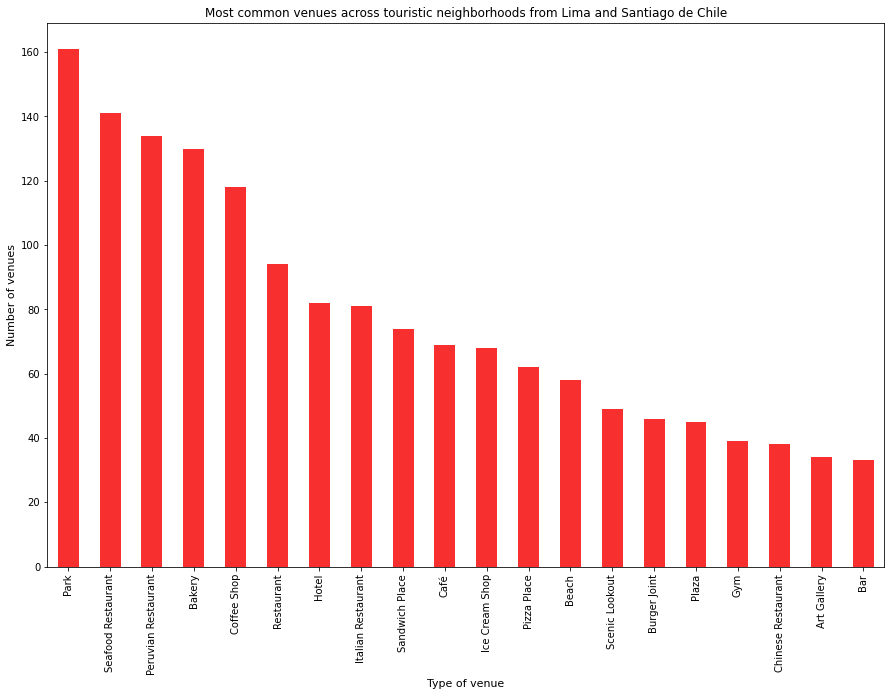

In [25]:
import matplotlib.pyplot as plt # Plotting library, which uses the matplotlib.pyplot interface for a quick and easy generation of plots

lima_scl_tourist_venues['Venue Category'].value_counts().nlargest(20).plot(kind='bar', figsize=(15,10), color='#f72f2f')
plt.title('Most common venues across touristic neighborhoods from Lima and Santiago de Chile', fontsize=12)
plt.ylabel('Number of venues', fontsize=11)
plt.xlabel('Type of venue', fontsize=11)
plt.show()

From this bar chart, we can infer that in these touristic neighborhoods there is a predominance of Parks, Restaurants, Bakeries and Coffee Shops.

First, in Lima and Santiago de Chile, people love to **visit outdoor places specially parks, which are the biggest open places in the big cities**. The reason of this choice, is mainly to escape from the stress of the city, practice sports, share and enjoy a picnic with family, friends, take the pet for a walk or just relax lying on the grass.

On the other hand, inhabitants and tourists of both capital cities **enjoy eating national and international food from the best restaurants in Lima and Santiago de Chile**. Here we notice the influence of **Seafoods and Peruvian gastronomy** on Chileans and Peruvians.

The first one is explained because **both are coastal countries and they have based an important part of their gastronomic culture on the consumption of seafood**.

And the influence of Peruvian gastronomy is due to: 

**1) Its cuisine is acclaimed as one of the best ones in the world. Last year (2019), Peru has awarded as World's Leading Culinary Destination [1]**.

**2) Is one of the main Peruvian export product; in Lima, its people are deeply rooted in their culture and that has led many Peruvian chefs to open many restaurants of their local food. Chile has received hundreds of thousands of Peruvian immigrants [2], who have installed restaurants of their local cuisine in that country**.

Finally, because in Chile specially people love to eat bread [3], and in both countries people often go to drink coffee while enjoying the company of friends and family, that explains the popularity of Bakeries and Coffee Shops which are among the most popular venues in Lima and Santiago de Chile.

#### **Now, we will compare these results with the most common venues from Lima and Santiago de Chile separatedly, only considering their touristic neighborhoods**

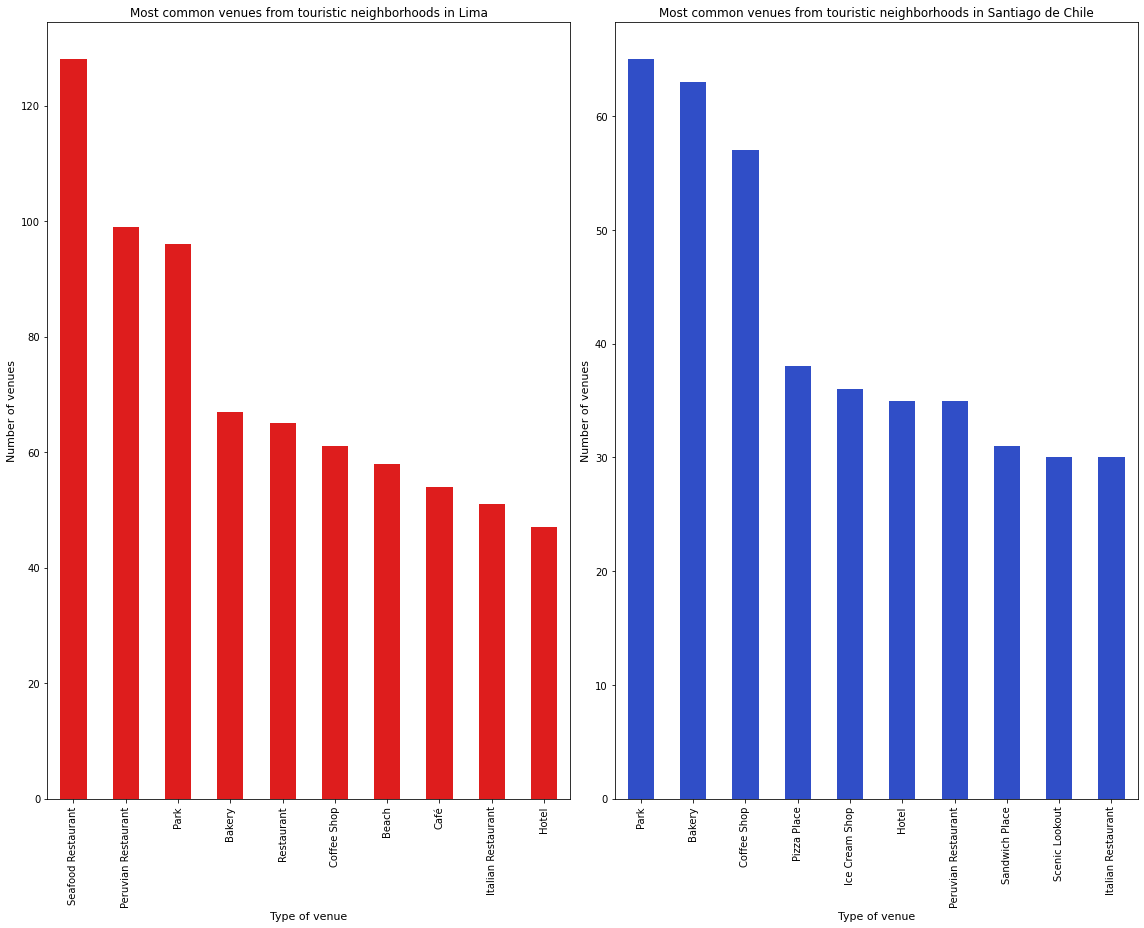

In [26]:
# Copy lima_venues into a new dataframe called lima_tourist_venues
lima_tourist_venues = lima_venues

# Copy scl_venues into a new dataframe called scl_tourist_venues
scl_tourist_venues = scl_venues

# Get the 10 most common venues across touristic neighborhoods in Lima and Santiago de Chile
lima_tourist_venues_order = lima_tourist_venues['Venue Category'].value_counts().nlargest(10) # For Lima
scl_tourist_venues_order = scl_tourist_venues['Venue Category'].value_counts().nlargest(10) # For Santiago de Chile

# Create the bar plots for Lima and Santiago de Chile, only considering the 10 most common venues
# from their touristic neighborhoods
fig, axes = plt.subplots(figsize=(16,13), nrows=1, ncols=2)
lima_tourist_venues_order.plot(ax=axes[0], kind='bar', color='#de1d1d')
axes[0].set_title('Most common venues from touristic neighborhoods in Lima', fontsize=12)
axes[0].set_ylabel('Number of venues', fontsize=11)
axes[0].set_xlabel('Type of venue', fontsize=11)

scl_tourist_venues_order.plot(ax=axes[1], kind='bar', color='#304ec7')
axes[1].set_title('Most common venues from touristic neighborhoods in Santiago de Chile', fontsize=12)
axes[1].set_ylabel('Number of venues', fontsize=11)
axes[1].set_xlabel('Type of venue', fontsize=11)

plt.tight_layout() # Adjust labels and titles to each subplot
plt.show() # Show both subplots

When we plot the most common venues from the touristic neighborhoods of Lima and Santiago de Chile, we can **notice similarities in some of the 10 most common places visited**: **Parks, Bakeries, Coffee Shops, Hotels, Peruvian and Italian Restaurants**. This would indicate us that **several neighborhoods between these cities will be grouped in the same clusters**. When neighborhoods are grouped and segmented *by running the k-Means clustering algorithm, this hypothesis will be tested*. But it's needed to **highlight that the number and order of each venue category are different**, so this *hypothesis may not be correct*.

Notice that there are also a couple of different venues, **which characterize the neighborhoods of each city separately**. In the case of **Lima**, we appreciate the influence of its proximity to the Pacific Ocean, because *some of the most common and distinct venues* with respect to Santiago de Chile are: **Seafood Restaurant and Beach**. Like every coastal city, **Lima** has taken advantage of the **harvest of Seafood products, the proximity to its beaches and development of attractions around them**, to show the world the wealth of its natural resources in favor of local and foreign tourism.

Meanwhile in **Santiago de Chile**, as this city is located in the Central Valley sorrounded by hills and mountains, different governments **have promoted the construction of Scenic Lookouts**: such as the ones in *Santa Lucía or San Cristóbal Hills*, to take advantage of panoramic views from the heights of its mountains to the city. These places have become some of the most favorite ones on Santiago de Chile. On the other hand, as Chile is the second country with highest bread consumption [3], local people and tourists love to visit **Sandwich Places** and eat one of the hundreds of sandwiches varieties, whose offer grows year by year thanks to new creations by chefs and new ingredients brought from immigrants. Finally, as the temperatures in Santiago de Chile are very high, specially during Spring and Summer [4], **locals and tourists love to buy an Ice Cream at one of their many shops** on these neighborhoods, to escape the heat that is felt in corner of this warm city.

Now, we need more detailed information about these venues. So we print the first 5 touristic neighborhoods from Lima and Santiago de Chile separately, along with its top 5 common venues.

In [27]:
# Print the first 5 touristic neighborhoods from Lima

# Create a new dataframe which groups the venues only from Lima's touristic neighborhoods
lima_tourist_groups = lima_scl_groups.loc[lima_scl_groups['Neighborhood Name'].isin(['BARRANCO','BREÑA','CHACLACAYO','SAN FRANCISCO DE BORJA','SAN ISIDRO',
                                                                                     'SAN MIGUEL','SANTIAGO DE SURCO','SURQUILLO','JESUS MARIA','LINCE',
                                                                                     'MAGDALENA DEL MAR','PUEBLO LIBRE','MIRAFLORES','SANTA ROSA','PUCUSANA',
                                                                                     'PUNTA NEGRA','SANTA MARIA DEL MAR','ANCON','PUNTA HERMOSA','SAN BARTOLO',
                                                                                     'CALLAO','BELLAVISTA','LA PUNTA','CHORRILLOS','LIMA','LA VICTORIA'])].reset_index(drop=True)

top_venues_neigh_lima = 5

for hood_lima in lima_tourist_groups['Neighborhood Name'].head():
    print("---"+hood_lima+"---")
    temp_lima = lima_scl_groups[lima_scl_groups['Neighborhood Name'] == hood_lima].T.reset_index()
    temp_lima.columns = ['Venue', 'Frequency']
    temp_lima = temp_lima.iloc[1:]
    temp_lima['Frequency'] = temp_lima['Frequency'].astype(float)
    temp_lima = temp_lima.round({'Frequency': 2})
    print(temp_lima.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues_neigh_lima))
    print('\n')

---ANCON---
                 Venue  Frequency
0                Beach       0.29
1   Seafood Restaurant       0.21
2                 Park       0.14
3            Surf Spot       0.07
4  Peruvian Restaurant       0.07


---BARRANCO---
                 Venue  Frequency
0  Peruvian Restaurant       0.09
1   Seafood Restaurant       0.09
2                 Park       0.07
3                Hotel       0.06
4           Restaurant       0.05


---BELLAVISTA---
                 Venue  Frequency
0   Seafood Restaurant       0.09
1      Harbor / Marina       0.07
2                Plaza       0.07
3  Peruvian Restaurant       0.07
4                  Gym       0.04


---BREÑA---
                 Venue  Frequency
0  Peruvian Restaurant       0.07
1               Bakery       0.05
2                  Bar       0.05
3   Chinese Restaurant       0.04
4          Coffee Shop       0.04


---CALLAO---
                Venue  Frequency
0  Seafood Restaurant       0.13
1               Plaza       0.07
2       

In [123]:
# Print the first 5 touristic neighborhoods from Santiago de Chile

# Create a new dataframe which groups the venues only from Santiago de Chile's touristic neighborhoods
scl_tourist_groups = lima_scl_groups.loc[lima_scl_groups['Neighborhood Name'].isin(['Lo Barnechea','Penalolen','La Reina','Las Condes','Nunoa','Providencia',
                                                                                    'Vitacura','Conchali','Huechuraba','Independencia','Recoleta','Santiago'])].reset_index(drop=True)

top_venues_neigh_scl = 5

for hood_scl in scl_tourist_groups['Neighborhood Name'].head():
    print("---"+hood_scl+"---")
    temp_scl = lima_scl_groups[lima_scl_groups['Neighborhood Name'] == hood_scl].T.reset_index()
    temp_scl.columns = ['Venue', 'Frequency']
    temp_scl = temp_scl.iloc[1:]
    temp_scl['Frequency'] = temp_scl['Frequency'].astype(float)
    temp_scl = temp_scl.round({'Frequency': 2})
    print(temp_scl.sort_values('Frequency', ascending=False).reset_index(drop=True).head(top_venues_neigh_scl))
    print('\n')

---Conchali---
            Venue  Frequency
0     Coffee Shop       0.05
1          Bakery       0.05
2           Hotel       0.04
3  Scenic Lookout       0.04
4  Sandwich Place       0.04


---Huechuraba---
            Venue  Frequency
0      Restaurant       0.04
1  Ice Cream Shop       0.04
2        Tea Room       0.03
3  Scenic Lookout       0.03
4    Liquor Store       0.03


---Independencia---
                 Venue  Frequency
0          Coffee Shop       0.06
1                 Park       0.05
2                Hotel       0.04
3  Peruvian Restaurant       0.04
4       Sandwich Place       0.04


---La Reina---
                 Venue  Frequency
0               Bakery       0.09
1                 Park       0.08
2  Peruvian Restaurant       0.05
3          Coffee Shop       0.05
4   Italian Restaurant       0.04


---Las Condes---
                 Venue  Frequency
0                 Park       0.09
1               Bakery       0.08
2          Pizza Place       0.04
3  Peruvian Rest

#### Now, we have to insert the previous data into a *Pandas* dataframe.

#### The first step is create a function **to order the top 10 venues from each touristic neighborhood in descending order**.

In [28]:
top_venues_touristic_neighs = 10

def return_most_common_venues(row, top_venues_touristic_neighs):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues_touristic_neighs]

#### Then, we create a new dataframe called *lima_scl_neighvenues_sorted*, which contains the **top 10 venues for each touristic neighborhood in Lima and Santiago de Chile**.

In [29]:
top_venues_touristic_neighs = 10

indicators = ['st', 'nd', 'rd']

# Create columns in an ordinal way, according to the number of top venues
columns = ['Neighborhood Name']
for ind in np.arange(top_venues_touristic_neighs):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe called lima_neighvenues_sorted
lima_scl_neighvenues_sorted = pd.DataFrame(columns=columns)
lima_scl_neighvenues_sorted['Neighborhood Name'] = lima_scl_groups['Neighborhood Name']

for ind in np.arange(lima_scl_groups.shape[0]):
    lima_scl_neighvenues_sorted.iloc[ind, 1:] = return_most_common_venues(lima_scl_groups.iloc[ind, :], top_venues_touristic_neighs)
    
lima_scl_neighvenues_sorted.head(10) # Show the first 10 rows of lima_scl_neighvenues_sorted dataframe

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANCON,Beach,Seafood Restaurant,Park,Harbor / Marina,Dessert Shop,Restaurant,Surf Spot,Peruvian Restaurant,Farmers Market,Fast Food Restaurant
1,BARRANCO,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Sandwich Place,Ice Cream Shop,Scenic Lookout,Bakery,Steakhouse
2,BELLAVISTA,Seafood Restaurant,Harbor / Marina,Peruvian Restaurant,Plaza,Chinese Restaurant,Gym,Bakery,Boat or Ferry,Fast Food Restaurant,Restaurant
3,BREÑA,Peruvian Restaurant,Bar,Bakery,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Coffee Shop,Snack Place,Italian Restaurant,Plaza
4,CALLAO,Seafood Restaurant,Plaza,Supermarket,Harbor / Marina,Peruvian Restaurant,Coffee Shop,Fried Chicken Joint,Fast Food Restaurant,Restaurant,Gym
5,CHACLACAYO,Park,Dessert Shop,Peruvian Restaurant,Bakery,Market,Café,Snack Place,Food,Flea Market,Chinese Restaurant
6,CHORRILLOS,Seafood Restaurant,Restaurant,Peruvian Restaurant,Fried Chicken Joint,Burger Joint,Sandwich Place,Gym,Public Art,Scenic Lookout,Beach
7,Conchali,Coffee Shop,Bakery,Sandwich Place,Park,Hotel,Ice Cream Shop,Scenic Lookout,Farmers Market,Burger Joint,Tea Room
8,Huechuraba,Ice Cream Shop,Restaurant,Mountain,Liquor Store,Tea Room,Hotel,Park,Bakery,Scenic Lookout,Snack Place
9,Independencia,Coffee Shop,Park,Peruvian Restaurant,Sandwich Place,Pizza Place,Scenic Lookout,Hotel,Ice Cream Shop,Tea Room,Breakfast Spot


### II.III Cluster touristic neighborhoods in Lima and Santiago de Chile, using **k-Means Clustering Model**

In this part, we will cluster and segment touristic neighborhoods in Lima and Santiago de Chile into different groups, according to the results of the **k-Means Clustering Model**.

As it has been done and explained previously in this Capstone Project, we will run **k-Means** 20 times (K from 1 to 20), to determine the **optimal K according to the Elbow method**.

In [30]:
sum_squared_errors_lima_scl=[] # List that contains the SSE values for each 'K'
K=range(1,21) # Sequence of K values from 1 to 20

# Magic function to render plots within the browser
%matplotlib inline

lima_scl_groups_cluster = lima_scl_groups.drop('Neighborhood Name', axis=1) # Dataframe which contains the values of the neighborhoods to be clustered

for k_value in K:
    kmeans = KMeans(init="k-means++", n_clusters=k_value, n_init=20, random_state=0) # Initialize the k-Means model
    kmeans.fit(lima_scl_groups_cluster) # Train/fit the k-Means model
    sum_squared_errors_lima_scl.append(kmeans.inertia_) # Get the Sum of Squared Errors (SSE) value, for each 'K'

Next, we plot the SSE values with respecto to each **K value**, to find its optimal value.

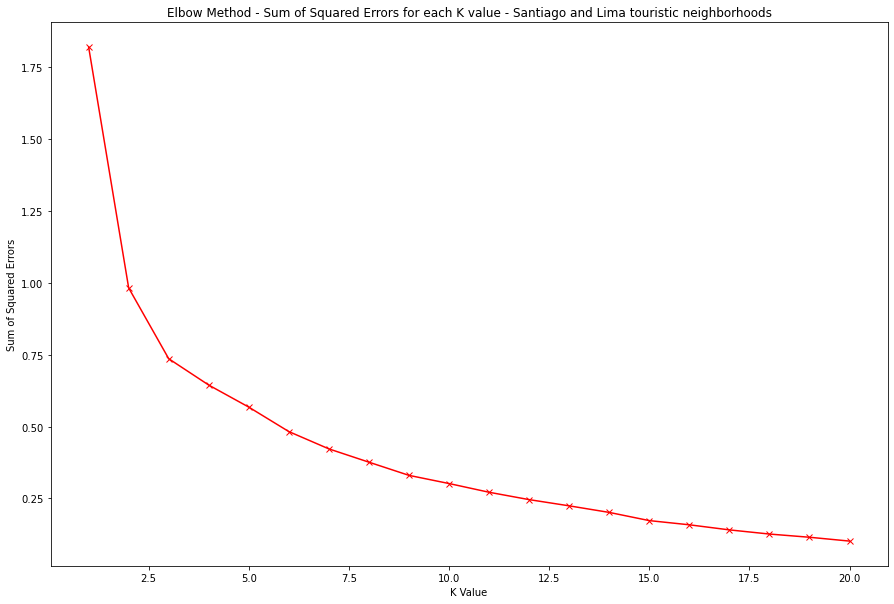

In [31]:
plt.figure(figsize=(15,10))
plt.plot(K, sum_squared_errors_lima_scl, 'rx-')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method - Sum of Squared Errors for each K value - Santiago and Lima touristic neighborhoods')
plt.show()

### Therefore, as the rate of SSE decrease shifts after K = 15, then our **optimal value for the number of clusters** using the Elbow method is **K = 15**.

In [32]:
k_optimal_lima_scl = 15

# Run k-Means clustering model for an optimal K value of 9
kmeans_optimal_lima_scl = KMeans(init="k-means++", n_clusters=k_optimal_lima_scl, n_init=40, random_state=0).fit(lima_scl_groups_cluster)

# Check cluster labels for each of the 36 neighborhoods that belong to Santiago de Chile
kmeans_optimal_lima_scl.labels_[:]

array([12,  4,  8, 11,  8, 14, 13,  3,  3,  3, 11, 13, 11, 11,  9,  3,  3,
        0,  4, 10,  3,  1, 11,  2,  6,  0,  3,  3,  7, 10,  9,  4,  7,  5,
        4, 10,  3,  3], dtype=int32)

Now, we create a new dataframe that contains the **clusters' labels and the top 10 venues for each touristic neighborhood, in Lima and Santiago de Chile,** as well.

Before doing that, we first need to **merge the dataframes** *df_scl* and *lima_neighs*. The steps to do that are shown next:

In [33]:
# We first drop the columns 'Province', 'Borough', 'Rural/Urban Neighborhood' from 'lima_venues' dataframe, and save it as 'lima_tourist_venues' dataframe
lima_touristic_neighs_venues = lima_neighs.drop(['Province', 'Borough', 'Rural/Urban Neighborhood'], axis=1)

# And then drop the column 'Location' from 'df_scl' dataframe, and save it as 'scl_touristic_neighs_venues'
scl_touristic_neighs_venues = df_scl.drop(['Location'], axis=1)

# Then, we merge both dataframes and show the 10 first rows from it
lima_scl_touristic_neighs_venues = lima_touristic_neighs_venues.append(scl_touristic_neighs_venues, ignore_index=True)

# Finally, we filter the neighborhoods from Lima and Santiago de Chile, only keeping the touristic ones
lima_scl_touristic_neighs_venues = lima_scl_touristic_neighs_venues.loc[lima_scl_touristic_neighs_venues['Neighborhood Name'].isin(['BARRANCO','BREÑA','CHACLACAYO',
                                                                                                          'SAN FRANCISCO DE BORJA','SAN ISIDRO','SAN MIGUEL','SANTIAGO DE SURCO',
                                                                                                          'SURQUILLO','JESUS MARIA','LINCE','MAGDALENA DEL MAR','PUEBLO LIBRE',
                                                                                                          'MIRAFLORES','SANTA ROSA','PUCUSANA','PUNTA NEGRA','SANTA MARIA DEL MAR',
                                                                                                          'ANCON','PUNTA HERMOSA','SAN BARTOLO','CALLAO','BELLAVISTA','LA PUNTA',
                                                                                                          'CHORRILLOS','LIMA','LA VICTORIA','Lo Barnechea','Penalolen','La Reina',
                                                                                                          'Las Condes','Nunoa','Providencia','Vitacura','Conchali','Huechuraba',
                                                                                                          'Independencia','Recoleta','Santiago'])].reset_index(drop=True)

# Show the the dataframe
lima_scl_touristic_neighs_venues

,Neighborhood Name,Latitude,Longitude
0,CALLAO,-12.051558,-77.134117
1,BELLAVISTA,-12.062462,-77.128632
2,LA PUNTA,-12.072643,-77.164256
3,BARRANCO,-12.149599,-77.024740
4,BREÑA,-12.056910,-77.053660
5,CHACLACAYO,-11.978380,-76.764340
6,CHORRILLOS,-12.174429,-77.024820
7,SAN FRANCISCO DE BORJA,-12.107939,-76.999070
8,SAN ISIDRO,-12.099109,-77.034630
9,SAN MIGUEL,-12.090060,-77.086650


Now we create the new **dataframe containing the cluster labels and the top 10 common venues per touristic neighborhood**

In [34]:
# Add clustering labels to the 'lima_scl_neighvenues_sorted' dataframe
#lima_scl_neighvenues_sorted = lima_scl_neighvenues_sorted.drop('Cluster Label', axis=1)
lima_scl_neighvenues_sorted.insert(0, 'Cluster Label', kmeans_optimal_lima_scl.labels_)

lima_scl_merged_df = lima_scl_touristic_neighs_venues
lima_scl_merged_df.columns = ['Neighborhood Name','Latitude','Longitude']


# Merge lima_scl_merged_df dataframe with lima_scl_touristic_neighvenues_sorted dataframe,
# to add geographical coordinates (Latitude, Longitude) for each neighborhood's venue
lima_scl_merged_df = lima_scl_merged_df.join(lima_scl_neighvenues_sorted.set_index('Neighborhood Name'), on='Neighborhood Name')

lima_scl_merged_df.head(10) # Show the first 10 rows of the dataframe

,Neighborhood Name,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CALLAO,-12.051558,-77.134117,8,Seafood Restaurant,Plaza,Supermarket,Harbor / Marina,Peruvian Restaurant,Coffee Shop,Fried Chicken Joint,Fast Food Restaurant,Restaurant,Gym
1,BELLAVISTA,-12.062462,-77.128632,8,Seafood Restaurant,Harbor / Marina,Peruvian Restaurant,Plaza,Chinese Restaurant,Gym,Bakery,Boat or Ferry,Fast Food Restaurant,Restaurant
2,LA PUNTA,-12.072643,-77.164256,13,Seafood Restaurant,Peruvian Restaurant,Beach,Harbor / Marina,Bakery,Art Gallery,Café,Restaurant,Scenic Lookout,Plaza
3,BARRANCO,-12.149599,-77.024740,4,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Sandwich Place,Ice Cream Shop,Scenic Lookout,Bakery,Steakhouse
4,BREÑA,-12.056910,-77.053660,11,Peruvian Restaurant,Bar,Bakery,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Coffee Shop,Snack Place,Italian Restaurant,Plaza
5,CHACLACAYO,-11.978380,-76.764340,14,Park,Dessert Shop,Peruvian Restaurant,Bakery,Market,Café,Snack Place,Food,Flea Market,Chinese Restaurant
6,CHORRILLOS,-12.174429,-77.024820,13,Seafood Restaurant,Restaurant,Peruvian Restaurant,Fried Chicken Joint,Burger Joint,Sandwich Place,Gym,Public Art,Scenic Lookout,Beach
7,SAN FRANCISCO DE BORJA,-12.107939,-76.999070,10,Park,Coffee Shop,Seafood Restaurant,Ice Cream Shop,Restaurant,Athletics & Sports,Dessert Shop,Yoga Studio,Café,Chinese Restaurant
8,SAN ISIDRO,-12.099109,-77.034630,9,Peruvian Restaurant,Park,Hotel,Café,Dessert Shop,Italian Restaurant,Restaurant,Chinese Restaurant,Clothing Store,Supermarket
9,SAN MIGUEL,-12.090060,-77.086650,4,Sandwich Place,Seafood Restaurant,Burger Joint,Italian Restaurant,Pizza Place,Café,Park,Peruvian Restaurant,Ice Cream Shop,Restaurant


### II.IV Use **Geopy** library to get the Latitude and Longitude values of Lima and Santiago de Chile.

To do this, we need to define a geocoder object to convert the name of the city (*address = 'Lima, Peru'*), to their Latitude and Longitude values. First, we define an agent which will be called *lima_touristic_explorer*.

In [35]:
lima_address = 'Lima, Peru'

lima_geolocator = Nominatim(user_agent="lima_touristic_explorer") # Nominatim creates a geocoder instance.
lima_location = lima_geolocator.geocode(lima_address) # Location contains the latitude and longitude values of Lima.
lima_latitude = lima_location.latitude # Latitude coordinate of Lima.
lima_longitude = lima_location.longitude # Longitude coordinate of Lima.
print('The geographical coordinates of Lima are {}, {}'.format(lima_latitude, lima_longitude))

The geographical coordinates of Lima are -12.0621065, -77.0365256


We repeat this step for Santiago de Chile, by defining a geocoder object to convert the name of the city (*address = 'Santiago, Chile'*), to their Latitude and Longitude values. First, we define an agent which will be called *scl_touristic_explorer*.

In [36]:
scl_address = 'Santiago, Chile'

scl_geolocator = Nominatim(user_agent="scl_touristic_explorer") # Nominatim creates a geocoder instance.
scl_location = scl_geolocator.geocode(scl_address) # Location contains the latitude and longitude values of Santiago de Chile.
scl_latitude = scl_location.latitude # Latitude coordinate of Santiago de Chile.
scl_longitude = scl_location.longitude # Longitude coordinate of Santiago de Chile.
print('The geographical coordinates of Santiago de Chile are {}, {}'.format(scl_latitude, scl_longitude))

The geographical coordinates of Santiago de Chile are -33.4377968, -70.6504451


### II.V Create **maps of Lima and Santiago de Chile, with its touristic neighborhoods superimposed on it** according to its Latitude and Longitude values.

#### Using the previous coordinates, we visualize Lima showing each of its touristic neighborhoods.

In [39]:
# Folium map of touristic neighborhoods in Lima, Peru

# Create lima_touristic_clusters_map map
lima_touristic_clusters_map = folium.Map(location=[lima_latitude, lima_longitude], zoom_start=10)

# Set color scheme for the clusters
x = np.arange(k_optimal_lima_scl)
ys = [i + x + (i*x)**2 for i in range(k_optimal_lima_scl)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Superimpose markers over lima_touristic_clusters_map map
markers_colors = []
for lat, lng, neigh, cluster in zip(lima_scl_merged_df['Latitude'], lima_scl_merged_df['Longitude'], lima_scl_merged_df['Neighborhood Name'], lima_scl_merged_df['Cluster Label']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lima_touristic_clusters_map)
    
lima_touristic_clusters_map

#### Similarly, we visualize Santiago de Chile showing each of its touristic neighborhoods.

In [40]:
# Folium map of touristic neighborhoods in Santiago de Chile, Chile

# Create scl_touristic_clusters_map map
scl_touristic_clusters_map = folium.Map(location=[scl_latitude, scl_longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(k_optimal_lima_scl)
ys = [i + x + (i*x)**2 for i in range(k_optimal_lima_scl)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Superimpose markers over scl_touristic_clusters_map map
markers_colors = []
for lat, lng, neigh, cluster in zip(lima_scl_merged_df['Latitude'], lima_scl_merged_df['Longitude'], lima_scl_merged_df['Neighborhood Name'], lima_scl_merged_df['Cluster Label']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(scl_touristic_clusters_map)
    
scl_touristic_clusters_map

Opposite to what we thought in the previous hypothesis, the **touristic neighborhoods from Lima and Santiago de Chile are dissimilar between each other**. That is because the **there are not similar neighborhoods from different cities in any cluster**.

In the next section, we will **display the most common venues on each cluster and analyze the differences**.

### II.VI **Segment and label Lima and Santiago de Chile neighborhood clusters**, according to their most common venues

To show what are the causes, we will **compare the venues categories which exist in more neighborhoods**, considering Lima and Santiago de Chile separately.

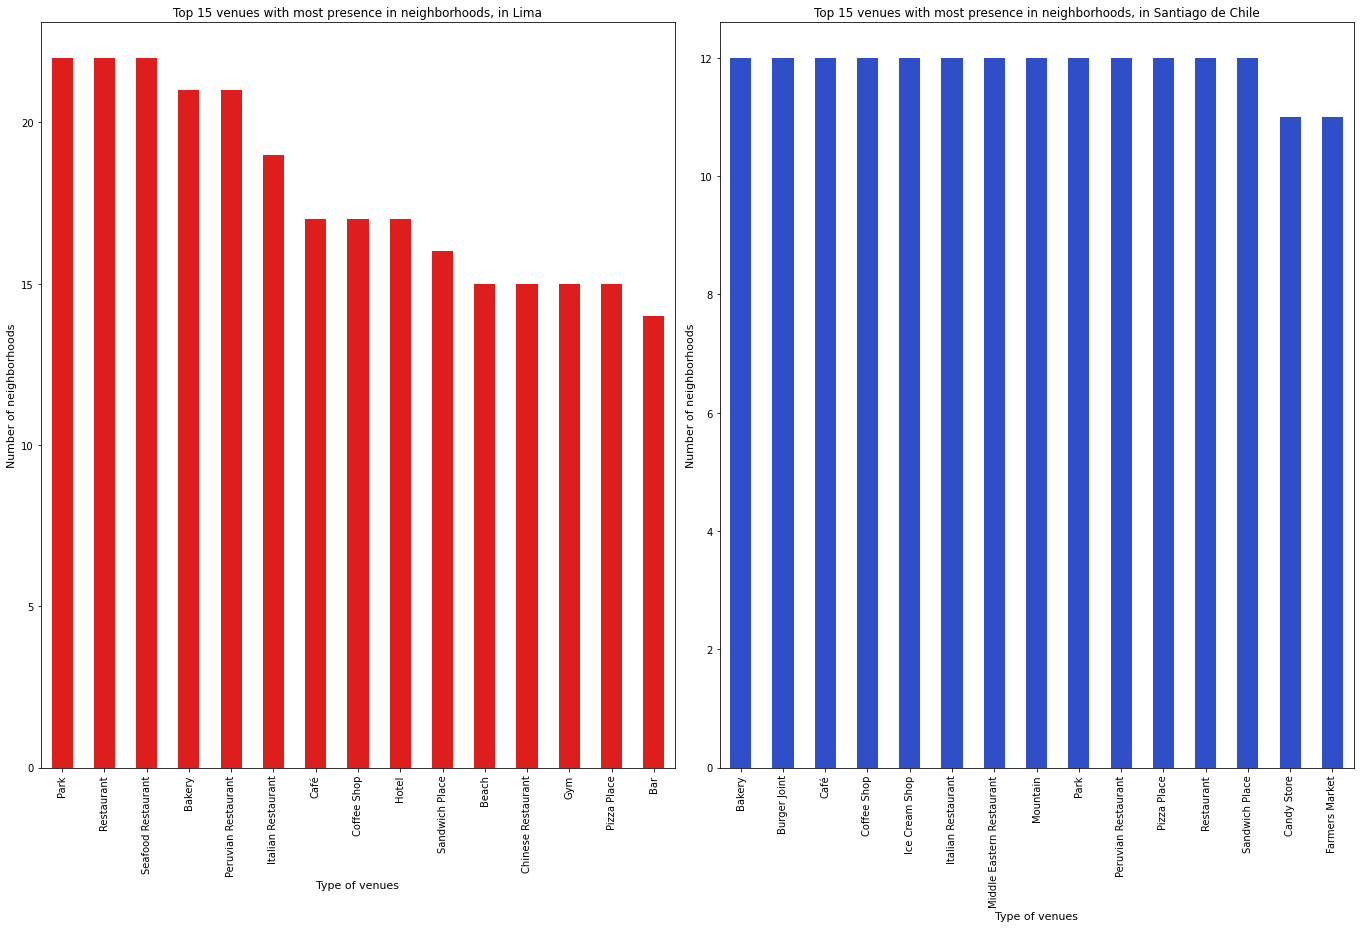

In [43]:
# Import lima_onehot.csv file to a Pandas dataframe of the same name
lima_onehot = pd.read_csv('lima_onehot.csv') # Read the .csv file into a dataframe called 'lima_onehot'

# Keep only touristic neighborhoods from Lima
lima_onehot = lima_onehot.loc[lima_onehot['Neighborhood Name'].isin(['BARRANCO','BREÑA','CHACLACAYO','SAN FRANCISCO DE BORJA','SAN ISIDRO',
                                                                'SAN MIGUEL','SANTIAGO DE SURCO','SURQUILLO','JESUS MARIA','LINCE',
                                                                'MAGDALENA DEL MAR','PUEBLO LIBRE','MIRAFLORES','SANTA ROSA','PUCUSANA',
                                                                'PUNTA NEGRA','SANTA MARIA DEL MAR','ANCON','PUNTA HERMOSA','SAN BARTOLO',
                                                                'CALLAO','BELLAVISTA','LA PUNTA','CHORRILLOS','LIMA','LA VICTORIA'])].reset_index(drop=True)

lima_onehot_neighs = lima_onehot.groupby('Neighborhood Name').max().reset_index()
lima_sum_neighs = lima_onehot_neighs.drop('Neighborhood Name', axis=1).sum().nlargest(15) # Top 10 venues with most presence in neighborhoods, in Lima

# Import lima_onehot.csv file to a Pandas dataframe of the same name
scl_onehot = pd.read_csv('scl_onehot.csv') # Read the .csv file into a dataframe called 'scl_onehot'


# Keep only touristic neighborhoods from Santiago de Chile
scl_onehot = scl_onehot.loc[scl_onehot['Neighborhood Name'].isin(['Lo Barnechea','Penalolen','La Reina','Las Condes','Nunoa','Providencia',
                                                             'Vitacura','Conchali','Huechuraba','Independencia','Recoleta','Santiago'])].reset_index(drop=True)

scl_onehot_neighs = scl_onehot.groupby('Neighborhood Name').max().reset_index()
scl_sum_neighs = scl_onehot_neighs.drop('Neighborhood Name', axis=1).sum().nlargest(15) # Top 10 venues with most presence in neighborhoods, in Santiago


# Create the bar plots for Lima and Santiago de Chile, only considering the 10 venues
# which appear in most touristic neighborhoods (descending order)
fig, axes = plt.subplots(figsize=(19,13), nrows=1, ncols=2)
lima_sum_neighs.plot(ax=axes[0], kind='bar', color='#de1d1d')
axes[0].set_title('Top 15 venues with most presence in neighborhoods, in Lima', fontsize=12)
axes[0].set_ylabel('Number of neighborhoods', fontsize=11)
axes[0].set_xlabel('Type of venues', fontsize=11)

scl_sum_neighs.plot(ax=axes[1], kind='bar', color='#304ec7')
axes[1].set_title('Top 15 venues with most presence in neighborhoods, in Santiago de Chile', fontsize=12)
axes[1].set_ylabel('Number of neighborhoods', fontsize=11)
axes[1].set_xlabel('Type of venues', fontsize=11)

plt.tight_layout() # Adjust labels and titles to each subplot
plt.show() # Show both subplots

From these two bar plots, we **notice important differences, in the frequency and distribution, of the 15 venues with most presences in touristic neighborhoods** of Lima and Santiago de Chile. These are explained by the following factors:

**Top 15 venues with most presence in neighborhoods, in Lima**

- In the case of touristic neighborhoods in Lima, we notice an important presence of local restaurants (Peruvian, Seafood and Chinese), which indicates us that inhabitants and tourists love local gastronomy and that explains its important presence.

- On the other hand, when people visit Lima they enjoy hanging with friends or family at their beaches, taking advantage of the extensive Lima coastline. There is also an important presence of Bars, where tourists love to take local and foreign drinks (including the famous Peruvian **Pisco Sour**), as one of the venues with most presences in touristic neighborhoods.

- Thirdly, in Lima's touristic neighborhoods there is a more important presence of Gyms, with presence in 15 zones. This would indicate that there is a higher demand and offer of places to train and practice indoor sports.

- Finally, as Lima is a much bigger city with more districts than Santiago de Chile, it has a bigger hotel offer available to reveive much more tourists from Peru and all over the world. Of course, taking advantage of their tourist attraction, the zones we are analyzing concentrate the biggest tourist demand in Lima and Callao.


**Top 15 venues with most presence in neighborhoods, in Santiago de Chile**

- Opposite to Lima, as we explained previously, Santiago de Chile and its inhabitants are highly influenced by foreign cultures, and this includes the cuisine too. We can appreciate this by noticing that the restaurants with most presences in touristic zones are: Burger Joints, Middle Eastern, Peruvian, Italian, Pizza and Sandwich places. This foreign influence can also be seen in the important presence of Candy Stores, which are present in 11 touristic neighborohoods in the city.

- Secondly, as Santiago de Chile is located in Chile's central valley, people can't enjoy the sea but the mountains. Locals and tourists love to do outdoor sports near these places (including hiking), and also appreciate from the mountain ranges of Santiago, the city from an aerial view.

- It is also important to remark that, due to the high temperatures in Santiago de Chile (specially in Spring and Summer [4]), people in the city love to enjoy Ice Creams and go to the shops to eat one. This explains the popularity of the Ice Cream shops and, by that way, people from Santiago de Chile and tourists can cool off during the hot days that are very frequent in this city.

- As a last point, Farmers Market are also one of the venues with most presence in Santiago's touristic neighborhoods. This is explained from the old tradition of Chileans, dating from the time when Chile was a Spanish Colony, to buy fruits and vegetables to these markets [5].

Next, we will **segment Santiago de Chile's touristic neighborhoods according to the re-cluster performed: label and name each one of them**. This will be done with respect to their most common venues.

First, we convert each cluster into their respective dataframe, to show which neighborhoods and most common venues fall into each one.

In [44]:
# Dataframe for Cluster 0: Peñalolén and Lo Barnechea (Santiago, Chile)
cluster_0_scl = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 0, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Clusters 1, 5, 6: Santa Rosa, Pucusana and Punta Negra (Lima, Peru)
clusters_1_5_6_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'].isin([1, 5, 6]), lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 2: Punta Hermosa (Lima, Peru)
cluster_2_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 2, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 3: Las Condes, La Reina, Huechuraba, Vitacura, Providencia, Ñuñoa, Santiago, Independencia, Conchalí, Recoleta (Santiago, Chile)
cluster_3_scl = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 3, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 4: San Miguel, Magdalena del Mar, Barranco, Santiago de Surco (Lima, Peru)
cluster_4_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 4, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 7: San Bartolo and Santa María del Mar (Lima, Peru)
cluster_7_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 7, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 8: Bellavista and Callao (Lima, Peru)
cluster_8_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 8, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 9: San Isidro and Lince (Lima, Peru)
cluster_9_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 9, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 10: Miraflores, Surquillo and San Francisco de Borja (Lima, Peru)
cluster_10_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 10, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 11: Breña, Lima, Jesus María, Pueblo Libre, La Victoria (Lima, Peru)
cluster_11_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 11, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 12: Ancón (Lima, Peru)
cluster_12_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 12, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 13: Chorrillos and La Punta (Lima, Peru)
cluster_13_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 13, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

# Dataframe for Cluster 14: Chaclacayo (Lima, Peru)
cluster_14_lima = lima_scl_merged_df.loc[lima_scl_merged_df['Cluster Label'] == 14, lima_scl_merged_df.columns[[0] + list(range(4, lima_scl_merged_df.shape[1]))]]

Now, we will label and segment each cluster as mentioned before. This time, we will analyze the differences between each separated analysis from each city and the joint analysis of both cities.

### **Cluster 0: Residential and outdoor cluster in Santiago de Chile**

#### Neighborhood Names: Lo Barnechea and Peñalolén.

In [45]:
cluster_0_scl

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Lo Barnechea,Gym,Bakery,Coffee Shop,Gym / Fitness Center,Shopping Mall,Golf Course,Restaurant,Supermarket,Pizza Place,Park
33,Penalolen,Bakery,Restaurant,Coffee Shop,Sushi Restaurant,Park,Pizza Place,Chinese Restaurant,Gym,Garden Center,Snack Place


### **Cluster 3: Gastronomic, financial and green areas cluster in Santiago de Chile's Northeast sector; merged with historical, commercial, bohemian and gastronomic cluster in Santiago de Chile's Downtown and North sector**

#### Neighborhood Names: Conchalí, Huechuraba, Independencia, La Reina, Las Condes, Ñuñoa, Providencia, Recoleta, Santiago and Vitacura.

In [46]:
cluster_3_scl

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Conchali,Coffee Shop,Bakery,Sandwich Place,Park,Hotel,Ice Cream Shop,Scenic Lookout,Farmers Market,Burger Joint,Tea Room
27,Huechuraba,Ice Cream Shop,Restaurant,Mountain,Liquor Store,Tea Room,Hotel,Park,Bakery,Scenic Lookout,Snack Place
28,Independencia,Coffee Shop,Park,Peruvian Restaurant,Sandwich Place,Pizza Place,Scenic Lookout,Hotel,Ice Cream Shop,Tea Room,Breakfast Spot
29,La Reina,Bakery,Park,Peruvian Restaurant,Coffee Shop,Italian Restaurant,Café,Plaza,Spa,Pizza Place,Ice Cream Shop
30,Las Condes,Park,Bakery,Ice Cream Shop,Peruvian Restaurant,Coffee Shop,Pizza Place,Tea Room,Italian Restaurant,Spa,Hotel
32,Nunoa,Bakery,Park,Peruvian Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Pizza Place,Sandwich Place,Scenic Lookout,Hotel
34,Providencia,Park,Hotel,Coffee Shop,Pizza Place,Bakery,Ice Cream Shop,Italian Restaurant,Tea Room,Scenic Lookout,Gift Shop
35,Recoleta,Coffee Shop,Hotel,Park,Scenic Lookout,Mountain,Peruvian Restaurant,Sandwich Place,Liquor Store,Ice Cream Shop,Plaza
36,Santiago,Coffee Shop,Park,Hotel,Sandwich Place,Peruvian Restaurant,Pizza Place,Ice Cream Shop,Tea Room,Scenic Lookout,Seafood Restaurant
37,Vitacura,Park,Bakery,Coffee Shop,Music Venue,Italian Restaurant,Restaurant,Scenic Lookout,Pizza Place,Mountain,Tea Room


### **Cluster 1, 5 and 6: Touristic beaches cluster in Nothern and Southern Lima**

#### Neighborhood names: Pucusana, Punta Negra and Santa Rosa.

In [47]:
clusters_1_5_6_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,SANTA ROSA,Beach,Pool,Plaza,Zoo Exhibit,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
22,PUCUSANA,Beach,Italian Restaurant,Pier,Harbor / Marina,Zoo Exhibit,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
24,PUNTA NEGRA,Beach,Nightclub,Fried Chicken Joint,Hotel,Plaza,Surf Spot,Other Great Outdoors,Fast Food Restaurant,French Restaurant,Food Truck


### **Cluster 2: Punta Hermosa coastal cluster in Southern Lima**

#### Neighborhood name: Punta Hermosa.

In [48]:
cluster_2_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,PUNTA HERMOSA,Beach,Seafood Restaurant,Nightclub,Pizza Place,Hotel,Restaurant,Pub,Bakery,Café,Burger Joint


### **Cluster 4: Gastronomic and green areas cluster in Lima**

#### Neighborhood names: Barranco, San Miguel, Santiago de Surco and Magdalena del Mar.

In [49]:
cluster_4_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BARRANCO,Seafood Restaurant,Peruvian Restaurant,Park,Hotel,Restaurant,Sandwich Place,Ice Cream Shop,Scenic Lookout,Bakery,Steakhouse
9,SAN MIGUEL,Sandwich Place,Seafood Restaurant,Burger Joint,Italian Restaurant,Pizza Place,Café,Park,Peruvian Restaurant,Ice Cream Shop,Restaurant
12,SANTIAGO DE SURCO,Park,Seafood Restaurant,Restaurant,Burger Joint,Coffee Shop,Sandwich Place,Beach,Public Art,Pizza Place,Soccer Field
19,MAGDALENA DEL MAR,Café,Park,Seafood Restaurant,Peruvian Restaurant,Ice Cream Shop,Italian Restaurant,Burger Joint,Scenic Lookout,Athletics & Sports,Sandwich Place


### **Cluster 7: Touristic beaches, outdoor sports and services cluster, in small towns at Southern Lima**

#### Neighborhood names: Santa María del Mar and San Bartolo.

In [50]:
cluster_7_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,SANTA MARIA DEL MAR,Beach,Seafood Restaurant,Italian Restaurant,Pizza Place,Restaurant,Market,Park,Campground,Sports Club,Scenic Lookout
25,SAN BARTOLO,Beach,Seafood Restaurant,Italian Restaurant,Surf Spot,Pizza Place,Hotel,Nightclub,Market,Restaurant,Rest Area


### **Cluster 8: Callao centric zone in the province of Callao, Lima**

#### Neighborhood names: Callao and Bellavista.

In [51]:
cluster_8_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CALLAO,Seafood Restaurant,Plaza,Supermarket,Harbor / Marina,Peruvian Restaurant,Coffee Shop,Fried Chicken Joint,Fast Food Restaurant,Restaurant,Gym
1,BELLAVISTA,Seafood Restaurant,Harbor / Marina,Peruvian Restaurant,Plaza,Chinese Restaurant,Gym,Bakery,Boat or Ferry,Fast Food Restaurant,Restaurant


### **Cluster 9: Financial and commercial cluster in Metropolitan Lima**

#### Neighborhood names: Lince and San Isidro.

In [52]:
cluster_9_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,SAN ISIDRO,Peruvian Restaurant,Park,Hotel,Café,Dessert Shop,Italian Restaurant,Restaurant,Chinese Restaurant,Clothing Store,Supermarket
18,LINCE,Peruvian Restaurant,Seafood Restaurant,Italian Restaurant,Café,Coffee Shop,Restaurant,Hotel,Park,Bakery,Japanese Restaurant


### **Cluster 10: Touristic, green areas and outdoor sports cluster in Metropolitan Lima**

#### Neighborhood names: Miraflores, San Francisco de Borja and Surquillo.

In [53]:
cluster_10_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,SAN FRANCISCO DE BORJA,Park,Coffee Shop,Seafood Restaurant,Ice Cream Shop,Restaurant,Athletics & Sports,Dessert Shop,Yoga Studio,Café,Chinese Restaurant
13,SURQUILLO,Park,Coffee Shop,Hotel,Seafood Restaurant,Ice Cream Shop,Bakery,Soccer Field,Yoga Studio,Café,Restaurant
21,MIRAFLORES,Park,Seafood Restaurant,Peruvian Restaurant,Café,Hotel,Coffee Shop,Bakery,Bar,Surf Spot,Vegetarian / Vegan Restaurant


### **Cluster 11: Historic, cultural and gastronomic cluster in Downtown Lima**

#### Neighborhood names: Breña, Jesús María, La Victoria, Lima and Pueblo Libre.

In [54]:
cluster_11_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,BREÑA,Peruvian Restaurant,Bar,Bakery,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Coffee Shop,Snack Place,Italian Restaurant,Plaza
14,LIMA,Chinese Restaurant,Plaza,Bakery,Sandwich Place,Restaurant,Bar,Art Gallery,Seafood Restaurant,Peruvian Restaurant,Park
16,JESUS MARIA,Peruvian Restaurant,Bakery,Italian Restaurant,Park,Coffee Shop,Theater,Gym,Seafood Restaurant,BBQ Joint,Movie Theater
17,LA VICTORIA,Bakery,Chinese Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Peruvian Restaurant,Plaza,Park,Restaurant,Theater
20,PUEBLO LIBRE,Coffee Shop,Peruvian Restaurant,Bakery,Café,Breakfast Spot,Italian Restaurant,Sandwich Place,Chinese Restaurant,Theater,Burger Joint


### **Cluster 12: Touristic beach and small coastal town cluster in Ancón, Northern Lima**

#### Neighborhood name: Ancón.

In [55]:
cluster_12_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,ANCON,Beach,Seafood Restaurant,Park,Harbor / Marina,Dessert Shop,Restaurant,Surf Spot,Peruvian Restaurant,Farmers Market,Fast Food Restaurant


### **Cluster 13: Coastal, gastronomic and green areas cluster from Callao and Lima provinces**

#### Neighborhood names: Chorrillos and La Punta.

In [56]:
cluster_13_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,LA PUNTA,Seafood Restaurant,Peruvian Restaurant,Beach,Harbor / Marina,Bakery,Art Gallery,Café,Restaurant,Scenic Lookout,Plaza
6,CHORRILLOS,Seafood Restaurant,Restaurant,Peruvian Restaurant,Fried Chicken Joint,Burger Joint,Sandwich Place,Gym,Public Art,Scenic Lookout,Beach


### **Cluster 14: Gastronomic and green areas cluster, at the countryside area of Chaclacayo in Lima's province**

#### Neighborhood name: Chaclacayo.

In [57]:
cluster_14_lima

,Neighborhood Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,CHACLACAYO,Park,Dessert Shop,Peruvian Restaurant,Bakery,Market,Café,Snack Place,Food,Flea Market,Chinese Restaurant


### Here we can see that **there was an important rearrange of clusters**, comparing the *analysis of each separated city, versus the joint analysis of touristic neighborhoods*

#### It jumps out the fact that in the joint analysis, **Lima's touristic clusters were much more segregated and well defined now**.

#### This is shown in the **increased number of clusters (from 6 to 13), and how close neighborhoods were better separated more precisely**; for example, in Downtown Lima and coastal neighborhoods.

#### According to this information, we would think that **k-Means clustering algorithm performed much better on this data**.

#### But if we **analyze the touristic clusters from Santiago de Chile, its number was reduced from 3 to 2**. Here we highlight the fact that the financial and gastronomic cluster was **merged with the historical, commercial and bohemian one**.

#### Considering that these touristic neighborhoods are very different, **we would think that k-Means performed worse in Santiago de Chile**. But why?

<hr>

**Because it is possible that k-Means algorithm arrived to a suboptimal result, due to:**

#### 1) Lack of venues data to perform a correctly clustering of the touristic neighborhoods, in Lima and Santiago de Chile.

#### 2) Elbow method and optimal *K* value chosen, led to a local optimal clustering [6].

#### 3) Because k-Means algorithm can't separate the points according to their density, and due to the fact that it is sensitive to outliers, k-Means itself would not be the recommended algorithm to tackle problems involving geospatial data.

**A good advice to get better results is to perform a deeper study on this project, by performing the same analysis using DBSCAN clustering due to the fact that it can find arbitrarily shaped clusters. Also because can prevent joining outlier points in previously optimal clusters. And finally, due to the fact that you do not need to precompute *K* to run the algorithm [7]**.

### II.VII **Deployment and recommendations** to improve Lima and Santiago de Chile's joint tourism

From the analysis, we infer that Lima and Santiago de Chile touristic neighborhoods are very dissimilar between each other.

This heterogeneity between both cities, opens a big oportunity to promote a consolidate alliances for a cooperative tourism, that can help both cities to recover their Tourism and Economies.

Some recommendations for touristic agencies and governments from Chile and Peru, are shown below:

#### 1) In first place, is essential that Chilean and Peruvian governments can **sign a cooperative tourism treaty**. This must **address the creation of cooperative guilds of touristic agencies, advertising of Lima and Santiago de Chile in mass communication media** worldwide, where the touristic venues and neighborhoods of each city are shown. And also, **tour around the world for promoting both capital cities in the five continents, including the creation of a web page and promote in social media** their touristic neighborhoods.

#### 2) On the other hand, is essential to **create a Chilean-Peruvian tourism organization**, where both cities can create a **common tourism fund and establish an organization which can direct cooperative tourism projects and funds**. This has the objective to create new projects for: **improving cities infrastructures, accesses and creating new venues** to attract new tourists to these attractive neighborhoods. Not only that, this fund is necessary to **give money to the tourist agencies that will work directly with tourists that will arrive (to Lima and Santiago de Chile), finance the ads, promotion tourism tours and promote online touristic marketing** for Lima and Santiago de Chile.

#### 3) Thirdly, as we know, the **security is a topic that worries local and foreign tourists** a lot. To ensure their safety, is necessary to **invest material and monetary resources to reinforce police control, provide more monetary and material support to ensure the safety of tourists**. And also, **improve the remote surveillance systems that can alert the police**, in a timely and accurate manner, about criminal acts in tourist neighborhoods and prevent crimes in a better way.

#### 4) Also, touristic agencies must work in **creating better tourist packages**, where the different goodnesses of Lima and Santiago de Chile are highlighted, given how different their neighborhoods are. Not only this, is **also important that these tourist packages can adjust to different tourists**, too. The idea is to offer packages to Lima, Santiago de Chile or both cities depending on the interest of each local or foreign tourist. But it is important when selling these packages, to **encourage tourists who only want to know one city, to know both. Therefore, the agencies will deliver special benefits and offers, for those who visit Lima and Santiago de Chile**. Thus, more tourists will want to visit both places.

#### 5) Finally, the work of touristic agencies is **key to promote tourism in streets**, and thus attract more tourists to Lima and Santiago de Chile each year. To advance in that direction, is **necessary that these agencies walk through all the corners of the touristic neighborhoods, to discover new venues and make more accurate descriptions of the most important venues** in each touristic zone. It is also important that they can **raise information about new potential tourist neighborhoods**, and **propose work plans** to the governments of Chile and Peru. Its goal is that they can **invest on new projects to convert more common neighborhoods into touristic ones**, helping by that way to generate more visits and tourism revenues, and also to improve life quality of thousands of neighbors from zones which today, are further away from the development and security they should have.

<hr>

## III. **Conclusions** from the Capstone Project

#### On the course of this project, we determine, segment the touristic clusters from Lima and Santiago de Chile, re-cluster and re-segment these neighborhoods to find if there were similar zones between both cities. This was done with the objective to propose a set of measures per cluster, for touristic agencies and governments from Chile and Peru, to improve tourism in the touristic zones of each cities. Not only that, but this project propose to them cooperative alliances and policies, that can help their countries to recover the touristic industry in a faster, more effectively way their tourism and economic GDP (revenues), and the number of tourists visiting Lima and Santiago de Chile post COVID-19 pandemic.

#### To do this, we adopted a Data Science working methodology [insert], involving a series of steps starting from Data Understanding, to clearly define this problem and data requirements to solve it. Then we performed a data preparation and exploratory data analysis of the neighborhoods and most common venues from Lima and Santiago de Chile. After that, we model the neighborhoods from each city using *k-Means* algorithm and mapped them using *Folium* maps. From here, we only chose the touristic neighborhoods for Lima (6) and Santiago de Chile (3). Next, we segmented and labeled these touristic neighborhoods, to suggest a series of measures to promote tourism in each city: from promoting more sustainable ways of transport and expanding the hotel offer, to reinforce police security for tourists.

#### Next, we merged the information of touristic neighborhoods from Lima and Santiago de Chile, to re-model and re-evaluate (segment and label) the touristic neighborhoods to: find if there were similarities between both neighborhoods, detect possible differences in clusters between individual and joint analysis, and deploy measures for tourist agencies and governments to promote alliances and cooperative tourism between Chile and Peru. Here we concluded that the neighborhoods from both capital cities are very dissimilar, which is a big opportunity to promote both cities and attract more tourists. Also, we noticed that touristic clusters in Lima increased to 13, but in Santiago de Chile this number decreased to 2. This would indicate that k-Means would lead to a sub-optimal result and it is suggested to do a further analysis, using DBSCAN algorithm to prevent outliers issues and work better with geospatial data.

#### Finally, it is recommended for government and tourists agencies, to create cooperative guilds of agencies and sign a cooperative tourism treaty. This has as main objectives: promote tourism marketing presentially and in social media, deliver better packages so tourists can visit Lima and Santiago, establish a common tourist fund to deliver cooperative tourism projects of infrastructure and publicity in both cities, and discover new venues/potential touristic neighborhoods to further promote new and consolidated tourist areas in Lima and Santiago.

### **From this project we can conclude the following main points:**

### 1. Touristic neighborhoods from Lima are very dissimilar from the ones of Santiago de Chile. Although there share several common venues as parks, bakeries, coffee shops and restaurants, the order and frequency of the most common venues differ a lot. In the first city, there is a predominance of Local Cuisine Restaurants, Gyms, Bars and Beaches. Lima takes advantage of their coast, Peruvian cuisine and the promotion of Peruvian and international cocktails to promote these venues with most presences in touristic neighborhoods. In the case of Santiago de Chile, is distinguished by their Mountains, Foreign Restaurants, Ice Cream Shops and Farmers Markets. This can be explained because Santiago is a hot city located in Central Valley, with a culture highly influenced by foreign countries, but which still preserves old traditions from the time of the Spanish Colony, such as buying fruits and vegetables at the Farmer Market.

### 2. When we perform the cluster and segmentation of each city separately versus a joint analysis, we notice that the number of touristic clusters change drastically in Lima and Santiago de Chile. In the first city, the number of clusters increase from 6 to 13, and in the second one, this number decreases from 3 to 2. Here we noticed that, while in Lima the neighborhoods were more precisely segmented, in Santiago de Chile the historical and financial clusters were merged into a single one, giving a poor clustering. This indicates that k-Means maybe reached only a suboptimal solution; therefore, it is recommended in a further analysis to run the DBSCAN clustering algorithm with the data. Their advantages are: does not requires K value to run the algorithm, prevent joining outlier points in previously optimal clusters, and it can find arbitrarily shaped clusters (useful for geospatial data as in this problem).

### 3. To reactivate Chile and Peru economies after COVID-19 pandemic, a series of measures were proposed for both tourist agencies and governments. Locally, in the case of Lima, were proposed these solutions: promote more Lima beaches on brochures and mass media, improve road infrastructure, promote the use of bike and public transport in Metropolitan Lima, and also strengthen police control and upgrade security cameras to reduce crimes in Downtown Lima. For Santiago de Chile, is proposed to build cableways and advertise more for visiting natural parks near Andes mountain range, encourage the use of bikes at Northeast Sector and, as in Lima, also strengthen police control to protect tourist from being assaulted, and reduce the level of insecurity in Downtown Santiago.

### 4. And as last point, at a joint level, it is recommended for government and tourists agencies, to create cooperative guilds of agencies and sign a cooperative tourism treaty. This is done to promote cooperative tourism by working jointly between Chile and Peru, deliver bigger and better projects in infrastructure, publicity, tourist packages and discover/promote potential touristic neighborhoods, to recover the number of tourists visiting both countries and their tourism/economic GDP.

<hr>

## IV. References

[1] https://www.worldtravelawards.com/award-worlds-leading-culinary-destination-2019

[2] https://en.wikipedia.org/wiki/Immigration_to_Chile

[3] https://chile.travel/en/chile-the-sandwich-paradise

[4] https://www.holiday-weather.com/santiago/averages/

[5] https://journals.openedition.org/nuevomundo/60545

[6] https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

[7] https://datascience-enthusiast.com/Python/DBSCAN_Kmeans.html

<hr>